## 1. 기본 작업

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [229]:
train=pd.read_csv("train_df.csv",encoding="CP949")
test=pd.read_csv("test_df.csv",encoding="CP949")
submission=pd.read_csv("sample_submission.csv",encoding="CP949")

In [230]:
train.head()

,index,SEND_SPG_INNB,REC_SPG_INNB,DL_GD_LCLS_NM,DL_GD_MCLS_NM,INVC_CONT
0,0,1129000014045300,5011000220046300,패션의류,상의,3
1,1,1135000009051200,5011000178037300,생활/건강,반려동물,3
2,2,1135000030093100,5011000265091400,패션의류,기타패션의류,9
3,3,1154500002014200,5011000315087400,식품,농산물,10
4,4,1165000021008300,5011000177051200,식품,가공식품,3


column 설명
<li>SEND_SPG_INNB : 송하인_격자공간고유번호</li>
<li>REC_SPG_INNB : 수하인 격자공간고유번호</li>
<li>DL_GD_LCLS_NM : 카테고리_대</li>
<li>DL_GD_MCLS_NM : 카테고리_중</li>
<li>INVC_CONT : 운송장 건 수</li>

In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          32000 non-null  int64 
 1   SEND_SPG_INNB  32000 non-null  int64 
 2   REC_SPG_INNB   32000 non-null  int64 
 3   DL_GD_LCLS_NM  32000 non-null  object
 4   DL_GD_MCLS_NM  32000 non-null  object
 5   INVC_CONT      32000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [232]:
train.rename(columns={'DL_GD_LCLS_NM':'Category_1'},inplace=True)
train.rename(columns={'DL_GD_MCLS_NM':'Category_2'},inplace=True)
test.rename(columns={'DL_GD_LCLS_NM':'Category_1'},inplace=True)
test.rename(columns={'DL_GD_MCLS_NM':'Category_2'},inplace=True)

카테고리에 어떤 값들이 존재하는 지 확인

In [233]:
print('카테고리_대 종류 : ',train['Category_1'].unique())
print('카테고리_소 종류 : ',train['Category_2'].unique())

카테고리_대 종류 :  ['패션의류' '생활/건강' '식품' '화장품/미용' '여행/문화' '디지털/가전']
카테고리_소 종류 :  ['상의' '반려동물' '기타패션의류' '농산물' '가공식품' '스킨케어' '기타식품' '생활용품' '건강식품' '주방용품'
 '건강용품' '냉동/간편조리식품' '문구/사무용품' '축산' '문화컨텐츠' '음반' '음료' '수산' '과자' '기타디지털/가전']


카테고리 대분류에 따른 하위 카테고리를 확인

In [234]:
fashion=train[train['Category_1']=='패션의류'].copy()
lifestyle=train[train['Category_1']=='생활/건강'].copy()
food=train[train['Category_1']=='식품'].copy()
cosmetics=train[train['Category_1']=='화장품/미용'].copy()
culture=train[train['Category_1']=='여행/문화'].copy()
electronics=train[train['Category_1']=='디지털/가전'].copy()

In [235]:
category_1=[fashion,lifestyle,food,cosmetics,culture,electronics]

In [236]:
print('패션의류의 하위 카테고리: ',fashion['Category_2'].unique())
print('생활/건강의 하위 카테고리: ',lifestyle['Category_2'].unique())
print('식품의 하위 카테고리: ',food['Category_2'].unique())
print('화장품/미용의 하위 카테고리: ',cosmetics['Category_2'].unique())
print('여행/문화의 하위 카테고리: ',culture['Category_2'].unique())
print('디지털/가전의 하위 카테고리: ',electronics['Category_2'].unique())

패션의류의 하위 카테고리:  ['상의' '기타패션의류']
생활/건강의 하위 카테고리:  ['반려동물' '생활용품' '주방용품' '건강용품' '문구/사무용품' '음반']
식품의 하위 카테고리:  ['농산물' '가공식품' '기타식품' '건강식품' '냉동/간편조리식품' '축산' '음료' '수산' '과자']
화장품/미용의 하위 카테고리:  ['스킨케어']
여행/문화의 하위 카테고리:  ['문화컨텐츠']
디지털/가전의 하위 카테고리:  ['기타디지털/가전']


## 2. Exploratory Data Analysis

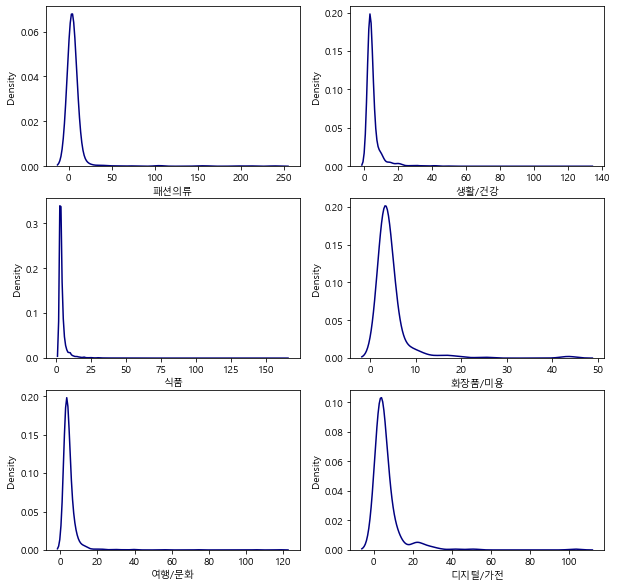

In [237]:
plt.figure(figsize=(10,10))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    sns.kdeplot(category_1[i]['INVC_CONT'],color='navy')
    plt.xlabel(train['Category_1'].unique()[i])

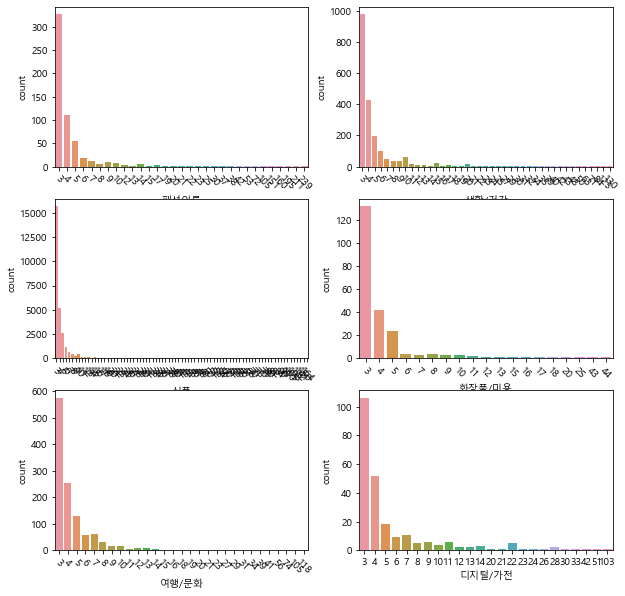

In [238]:
plt.figure(figsize=(10,10))
for i in range(0,6):
    plt.xticks(rotation=-45)
    plt.subplot(3,2,i+1)
    sns.countplot(category_1[i]['INVC_CONT'])
    plt.xlabel(train['Category_1'].unique()[i])

In [239]:
for i in range(0,5):
    print(train['Category_1'].unique()[i])
    print(category_1[i].describe()['INVC_CONT'])
    print('---------------------------')

패션의류
count    582.000000
mean       6.678694
std       19.133327
min        3.000000
25%        3.000000
50%        3.000000
75%        4.000000
max      239.000000
Name: INVC_CONT, dtype: float64
---------------------------
생활/건강
count    2020.000000
mean        5.407921
std         6.667207
min         3.000000
25%         3.000000
50%         4.000000
75%         5.000000
max       130.000000
Name: INVC_CONT, dtype: float64
---------------------------
식품
count    27738.000000
mean         4.658195
std          4.961598
min          3.000000
25%          3.000000
50%          3.000000
75%          4.000000
max        164.000000
Name: INVC_CONT, dtype: float64
---------------------------
화장품/미용
count    227.000000
mean       4.682819
std        4.718239
min        3.000000
25%        3.000000
50%        3.000000
75%        4.000000
max       44.000000
Name: INVC_CONT, dtype: float64
---------------------------
여행/문화
count    1192.000000
mean        4.958893
std         6.138548
min   

<AxesSubplot:xlabel='Category_1', ylabel='INVC_CONT'>

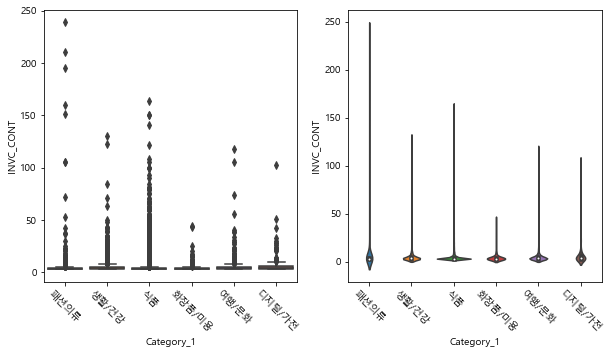

In [240]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=-45)
sns.boxplot(train['Category_1'],train['INVC_CONT'])
plt.subplot(1,2,2)
plt.xticks(rotation=-45)
sns.violinplot(train['Category_1'],train['INVC_CONT'])

<AxesSubplot:xlabel='Category_2', ylabel='INVC_CONT'>

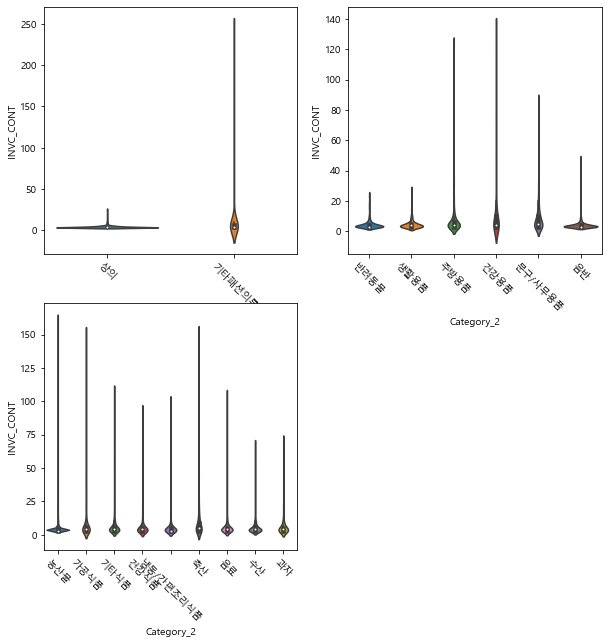

In [241]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xticks(rotation=-45)
sns.violinplot(fashion['Category_2'],fashion['INVC_CONT'])
plt.subplot(2,2,2)
plt.xticks(rotation=-45)
sns.violinplot(lifestyle['Category_2'],lifestyle['INVC_CONT'])
plt.subplot(2,2,3)
plt.xticks(rotation=-45)
sns.violinplot(food['Category_2'],food['INVC_CONT'])

## 3. 데이터 전처리

outlier 처리

In [242]:
for i in range(0,6):
    median=category_1[i].describe()['INVC_CONT']['75%']
    category_1[i]['INVC_CONT'][category_1[i]['INVC_CONT']>category_1[i].describe()['INVC_CONT']['75%']]=category_1[i].describe()['INVC_CONT']['75%']

In [252]:
le=LabelEncoder()
train['Category_1']=le.fit_transform(train['Category_1'])
train['Category_2']=le.fit_transform(train['Category_2'])
test['Category_1']=le.fit_transform(test['Category_1'])
test['Category_2']=le.fit_transform(test['Category_2'])

## 4. 모델링

In [253]:
train.columns

Index(['index', 'SEND_SPG_INNB', 'REC_SPG_INNB', 'Category_1', 'Category_2',
       'INVC_CONT'],
      dtype='object')

In [254]:
features=['Category_1', 'Category_2']
target='INVC_CONT'

In [255]:
X_train=train[features]
Y_train=train[target]
X_test=test[features]

In [256]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lr=LogisticRegression()
lgbc=LGBMClassifier()


In [257]:
print('DecisionTreeClassifier : ',cross_val_score(dtc,X_train,Y_train,cv=5).mean())
print('RandomForestClassifier : ',cross_val_score(rfc,X_train,Y_train,cv=5).mean())
print('LGBMClassifier : ',cross_val_score(lgbc,X_train,Y_train,cv=5).mean())

DecisionTreeClassifier :  0.5553125
RandomForestClassifier :  0.5553125
LGBMClassifier :  0.36115625


In [258]:
rfc.fit(X_train,Y_train)
result=rfc.predict(X_test)
submission['INVC_CONT']=result

In [259]:
submission.to_csv("submission.csv",index=False)